In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import norm, bernoulli, poisson
from scipy.optimize import minimize

# Fundamentals of Probability and Statistics

## 1. Basics of Distributions

### A. Expected Value (Mean)

The expected value $E[X]$ or $\mu$ is the long-run average value of a random variable:

For discrete random variables:
$E[X] = \sum_{i} x_i P(X = x_i)$

For continuous random variables:
$E[X] = \int_{-\infty}^{\infty} x f(x) dx$

### B. Standard Deviation and Variance

The variance $\sigma^2$ measures spread around the mean:
$Var(X) = E[(X - \mu)^2] = E[X^2] - (E[X])^2$

Standard deviation $\sigma$ is the square root of variance:
$\sigma = \sqrt{Var(X)}$

Let's visualize these concepts:

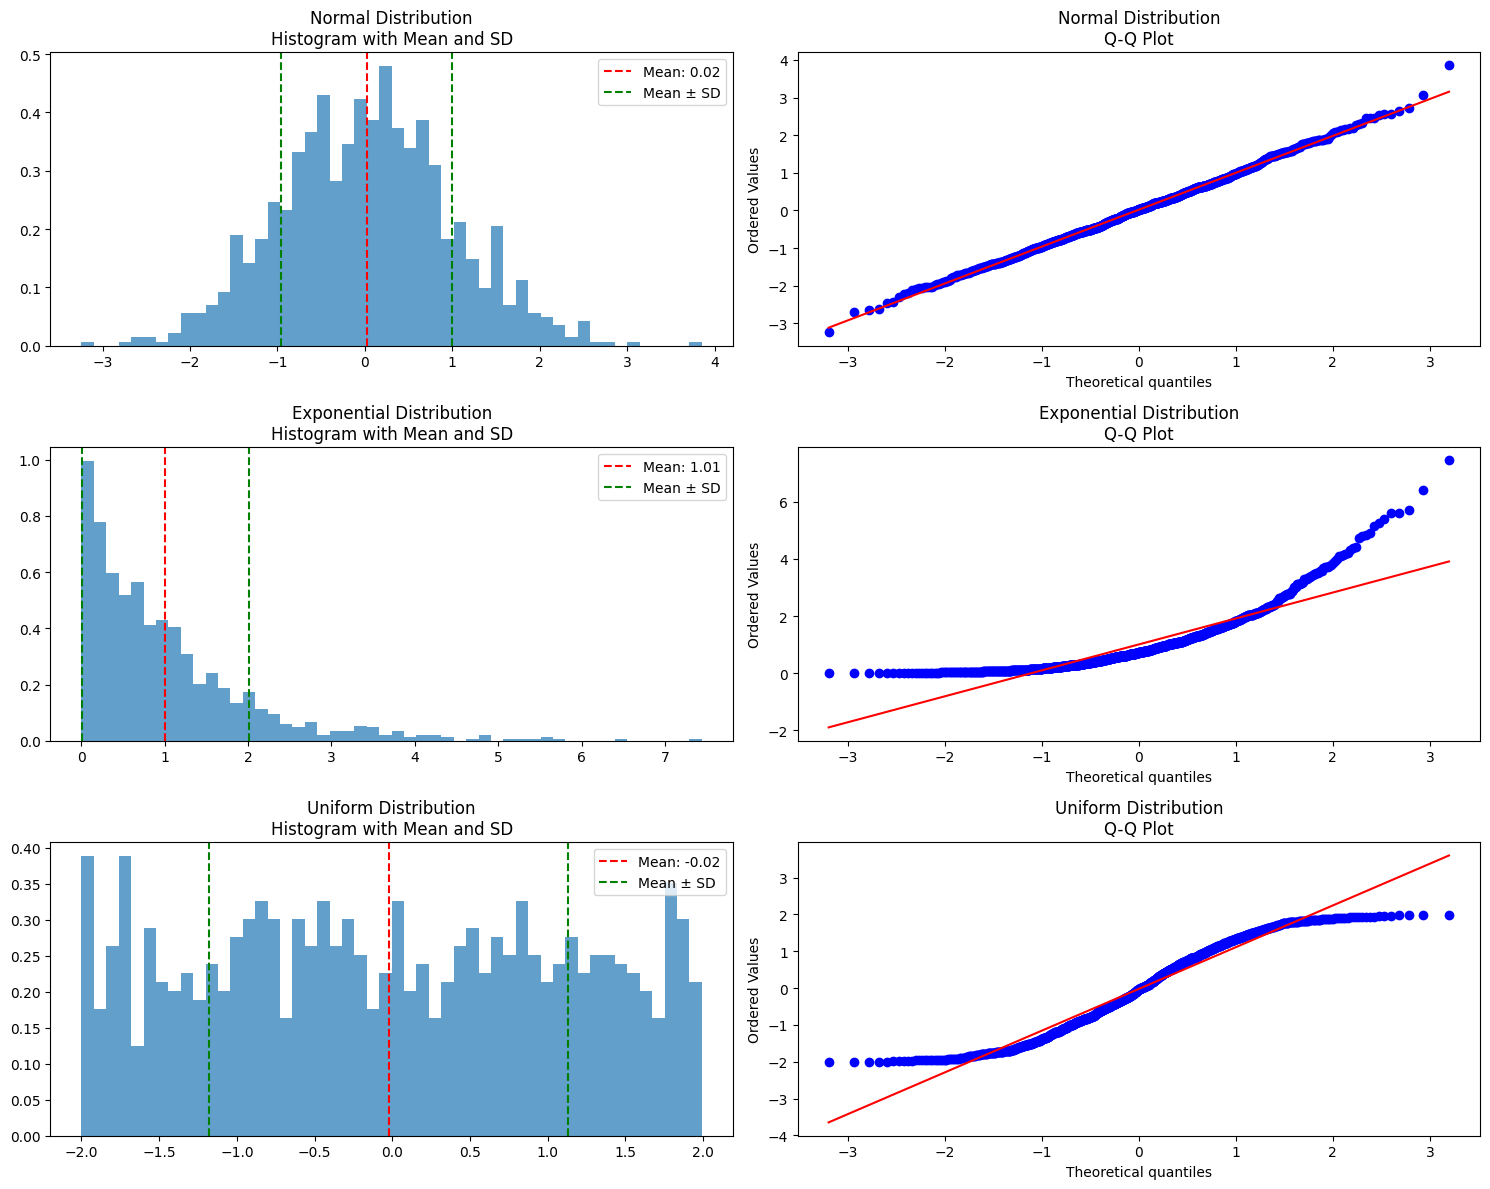

In [2]:
def visualize_distribution_basics():
    # Generate random data from different distributions
    np.random.seed(42)
    n_samples = 1000
    
    # Normal distribution
    normal_data = np.random.normal(loc=0, scale=1, size=n_samples)
    
    # Exponential distribution
    exponential_data = np.random.exponential(scale=1, size=n_samples)
    
    # Uniform distribution
    uniform_data = np.random.uniform(low=-2, high=2, size=n_samples)
    
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    
    # Plot histograms and theoretical PDFs
    distributions = [
        (normal_data, 'Normal Distribution'),
        (exponential_data, 'Exponential Distribution'),
        (uniform_data, 'Uniform Distribution')
    ]
    
    for idx, (data, title) in enumerate(distributions):
        # Histogram
        axes[idx, 0].hist(data, bins=50, density=True, alpha=0.7)
        axes[idx, 0].axvline(np.mean(data), color='r', linestyle='--', 
                            label=f'Mean: {np.mean(data):.2f}')
        axes[idx, 0].axvline(np.mean(data) + np.std(data), color='g', linestyle='--',
                            label=f'Mean ± SD')
        axes[idx, 0].axvline(np.mean(data) - np.std(data), color='g', linestyle='--')
        axes[idx, 0].set_title(f'{title}\nHistogram with Mean and SD')
        axes[idx, 0].legend()
        
        # Q-Q plot
        stats.probplot(data, dist="norm", plot=axes[idx, 1])
        axes[idx, 1].set_title(f'{title}\nQ-Q Plot')
    
    plt.tight_layout()
    plt.show()

visualize_distribution_basics()

### C. Normal Distribution

The normal (Gaussian) distribution is defined by its probability density function:

$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

Properties:
1. Symmetric about mean
2. Bell-shaped
3. 68-95-99.7 rule (standard deviations from mean)

Let's visualize these properties:

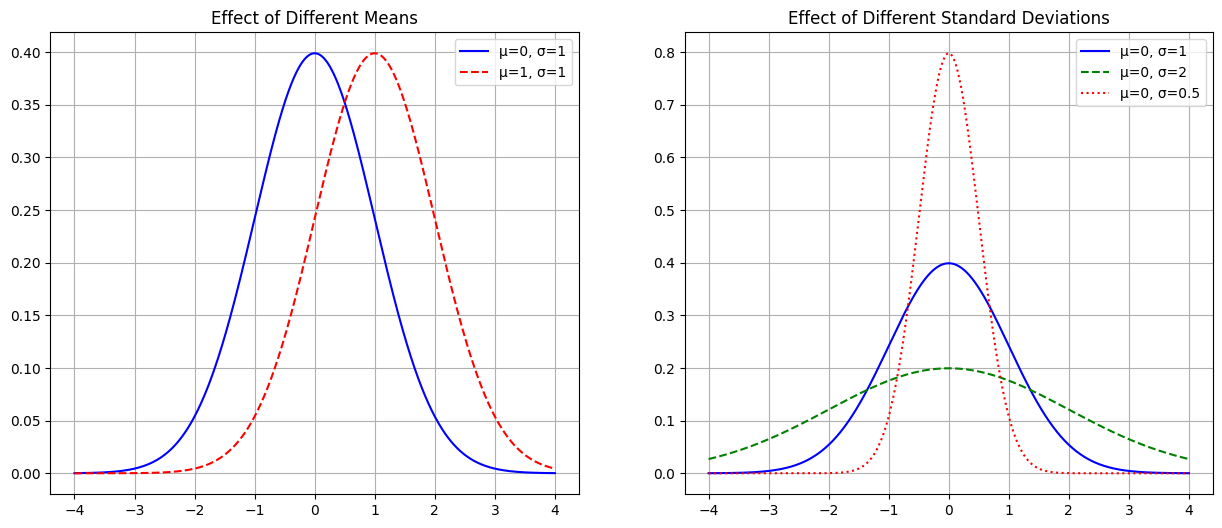

In [3]:
def visualize_normal_distribution():
    x = np.linspace(-4, 4, 1000)
    
    # Standard normal
    std_normal = stats.norm.pdf(x, 0, 1)
    
    # Different means
    shifted = stats.norm.pdf(x, 1, 1)
    
    # Different standard deviations
    wide = stats.norm.pdf(x, 0, 2)
    narrow = stats.norm.pdf(x, 0, 0.5)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot different means
    ax1.plot(x, std_normal, 'b-', label='μ=0, σ=1')
    ax1.plot(x, shifted, 'r--', label='μ=1, σ=1')
    ax1.set_title('Effect of Different Means')
    ax1.legend()
    ax1.grid(True)
    
    # Plot different standard deviations
    ax2.plot(x, std_normal, 'b-', label='μ=0, σ=1')
    ax2.plot(x, wide, 'g--', label='μ=0, σ=2')
    ax2.plot(x, narrow, 'r:', label='μ=0, σ=0.5')
    ax2.set_title('Effect of Different Standard Deviations')
    ax2.legend()
    ax2.grid(True)
    
    plt.show()

visualize_normal_distribution()

## 2. Log Likelihood

The log-likelihood function measures how well a statistical model fits observed data:

$\ell(\theta; x) = \log L(\theta; x) = \log \prod_{i=1}^n f(x_i|\theta) = \sum_{i=1}^n \log f(x_i|\theta)$

Benefits of using log-likelihood:
1. Converts products to sums (computationally easier)
2. Prevents numerical underflow
3. Preserves maximum location (monotonic transformation)

Let's implement a simple example:
'''

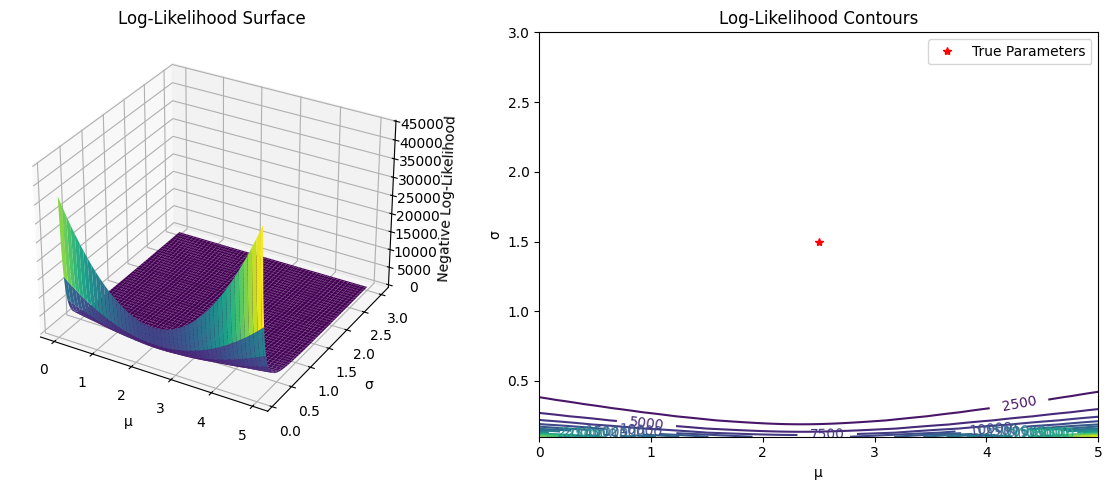

In [4]:
def demonstrate_log_likelihood():
    # Generate some data from a normal distribution
    np.random.seed(42)
    true_mu = 2.5
    true_sigma = 1.5
    n_samples = 100
    data = np.random.normal(true_mu, true_sigma, n_samples)
    
    # Function to compute log-likelihood for normal distribution
    def normal_log_likelihood(params, data):
        mu, sigma = params
        return -np.sum(norm.logpdf(data, mu, sigma))
    
    # Grid search for visualization
    mu_range = np.linspace(0, 5, 100)
    sigma_range = np.linspace(0.1, 3, 100)
    mu_grid, sigma_grid = np.meshgrid(mu_range, sigma_range)
    ll_grid = np.zeros_like(mu_grid)
    
    for i in range(len(mu_range)):
        for j in range(len(sigma_range)):
            ll_grid[j, i] = normal_log_likelihood([mu_grid[j, i], sigma_grid[j, i]], data)
    
    # Plot log-likelihood surface
    fig = plt.figure(figsize=(12, 5))
    
    # Surface plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(mu_grid, sigma_grid, ll_grid, cmap='viridis')
    ax1.set_xlabel('μ')
    ax1.set_ylabel('σ')
    ax1.set_zlabel('Negative Log-Likelihood')
    ax1.set_title('Log-Likelihood Surface')
    
    # Contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contour(mu_grid, sigma_grid, ll_grid, levels=20)
    ax2.clabel(contour, inline=True)
    ax2.set_xlabel('μ')
    ax2.set_ylabel('σ')
    ax2.set_title('Log-Likelihood Contours')
    ax2.plot(true_mu, true_sigma, 'r*', label='True Parameters')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

demonstrate_log_likelihood()

## 3. Maximum Likelihood Estimators (MLE)

MLE finds the parameters that maximize the likelihood (or log-likelihood) function:

$\hat{\theta}_{MLE} = \arg\max_{\theta} \log L(\theta; x)$

Properties of MLE:
1. Consistency
2. Asymptotic normality
3. Asymptotic efficiency

Let's implement MLE for a simple example:

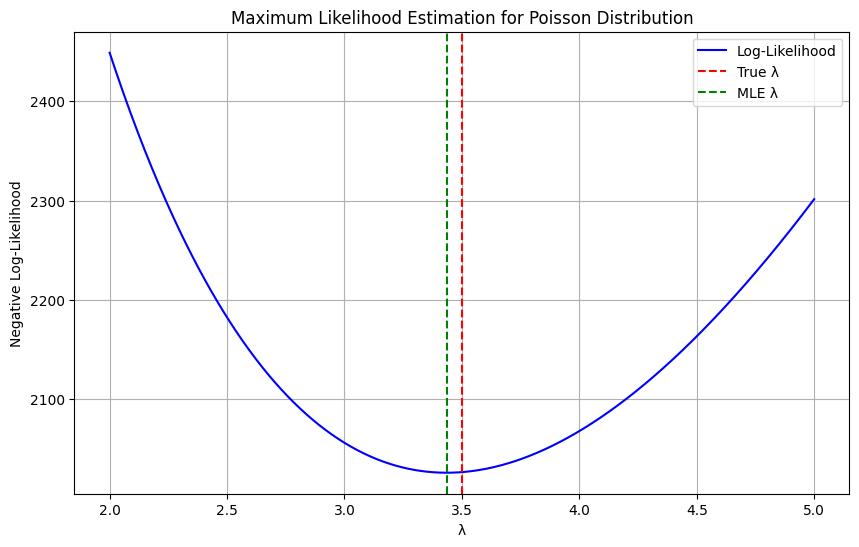

In [5]:
def demonstrate_mle():
    # Generate data from a Poisson distribution
    true_lambda = 3.5
    n_samples = 1000
    np.random.seed(42)
    data = np.random.poisson(true_lambda, n_samples)
    
    # Poisson log-likelihood function
    def poisson_log_likelihood(lambda_param, data):
        return -np.sum(stats.poisson.logpmf(data, lambda_param))
    
    # Find MLE using optimization
    result = minimize(poisson_log_likelihood, x0=[1], args=(data,), method='Nelder-Mead')
    mle_lambda = result.x[0]
    
    # Visualize
    lambda_range = np.linspace(2, 5, 1000)
    ll_values = [poisson_log_likelihood(l, data) for l in lambda_range]
    
    plt.figure(figsize=(10, 6))
    plt.plot(lambda_range, ll_values, 'b-', label='Log-Likelihood')
    plt.axvline(true_lambda, color='r', linestyle='--', label='True λ')
    plt.axvline(mle_lambda, color='g', linestyle='--', label='MLE λ')
    plt.xlabel('λ')
    plt.ylabel('Negative Log-Likelihood')
    plt.title('Maximum Likelihood Estimation for Poisson Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return mle_lambda

mle_estimate = demonstrate_mle()


## 4. Random Variables

A random variable is a function that assigns a real number to each outcome in a sample space.

Types:
1. **Discrete**: Takes countable values
2. **Continuous**: Takes uncountable values

Properties:
1. Probability Mass/Density Function (PMF/PDF)
2. Cumulative Distribution Function (CDF)
3. Moment Generating Function

Let's explore different types of random variables:

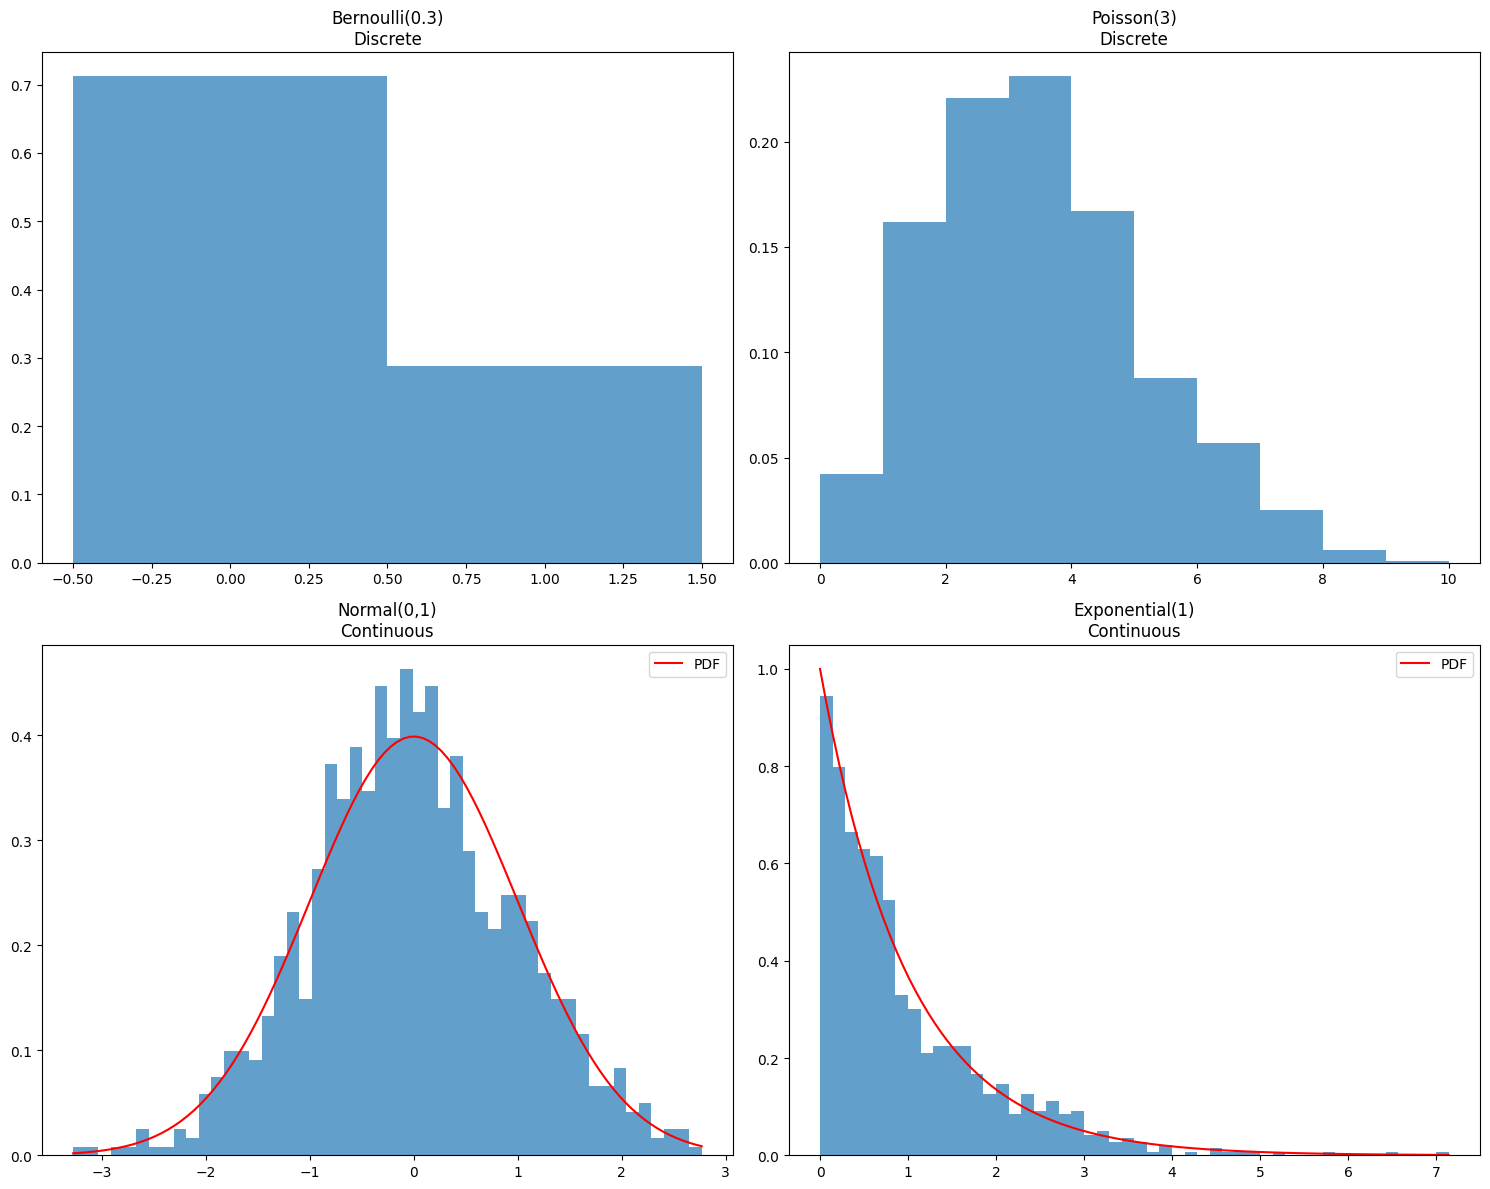

In [6]:
def explore_random_variables():
    # Generate different types of random variables
    n_samples = 1000
    np.random.seed(42)
    
    # Discrete: Bernoulli
    p = 0.3
    bernoulli_rv = np.random.binomial(1, p, n_samples)
    
    # Discrete: Poisson
    lambda_param = 3
    poisson_rv = np.random.poisson(lambda_param, n_samples)
    
    # Continuous: Normal
    normal_rv = np.random.normal(0, 1, n_samples)
    
    # Continuous: Exponential
    exponential_rv = np.random.exponential(1, n_samples)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot Bernoulli
    ax1.hist(bernoulli_rv, bins=[-0.5, 0.5, 1.5], density=True, alpha=0.7)
    ax1.set_title('Bernoulli(0.3)\nDiscrete')
    
    # Plot Poisson
    ax2.hist(poisson_rv, bins=range(max(poisson_rv)+2), density=True, alpha=0.7)
    ax2.set_title('Poisson(3)\nDiscrete')
    
    # Plot Normal
    ax3.hist(normal_rv, bins=50, density=True, alpha=0.7)
    x = np.linspace(min(normal_rv), max(normal_rv), 100)
    ax3.plot(x, norm.pdf(x, 0, 1), 'r-', label='PDF')
    ax3.set_title('Normal(0,1)\nContinuous')
    ax3.legend()
    
    # Plot Exponential
    ax4.hist(exponential_rv, bins=50, density=True, alpha=0.7)
    x = np.linspace(0, max(exponential_rv), 100)
    ax4.plot(x, stats.expon.pdf(x), 'r-', label='PDF')
    ax4.set_title('Exponential(1)\nContinuous')
    ax4.legend()
    
    plt.tight_layout()
    plt.show()

explore_random_variables()

## 5. Central Limit Theorem (CLT)

The Central Limit Theorem states that the sum (or average) of a large number of independent, identically distributed random variables will be approximately normally distributed, regardless of the underlying distribution.

Mathematically, for independent, identically distributed random variables $X_1, X_2, ..., X_n$ with mean $\mu$ and variance $\sigma^2$:

$\frac{\sum_{i=1}^n X_i - n\mu}{\sigma\sqrt{n}} \xrightarrow{d} N(0,1)$

Let's demonstrate this with different distributions:

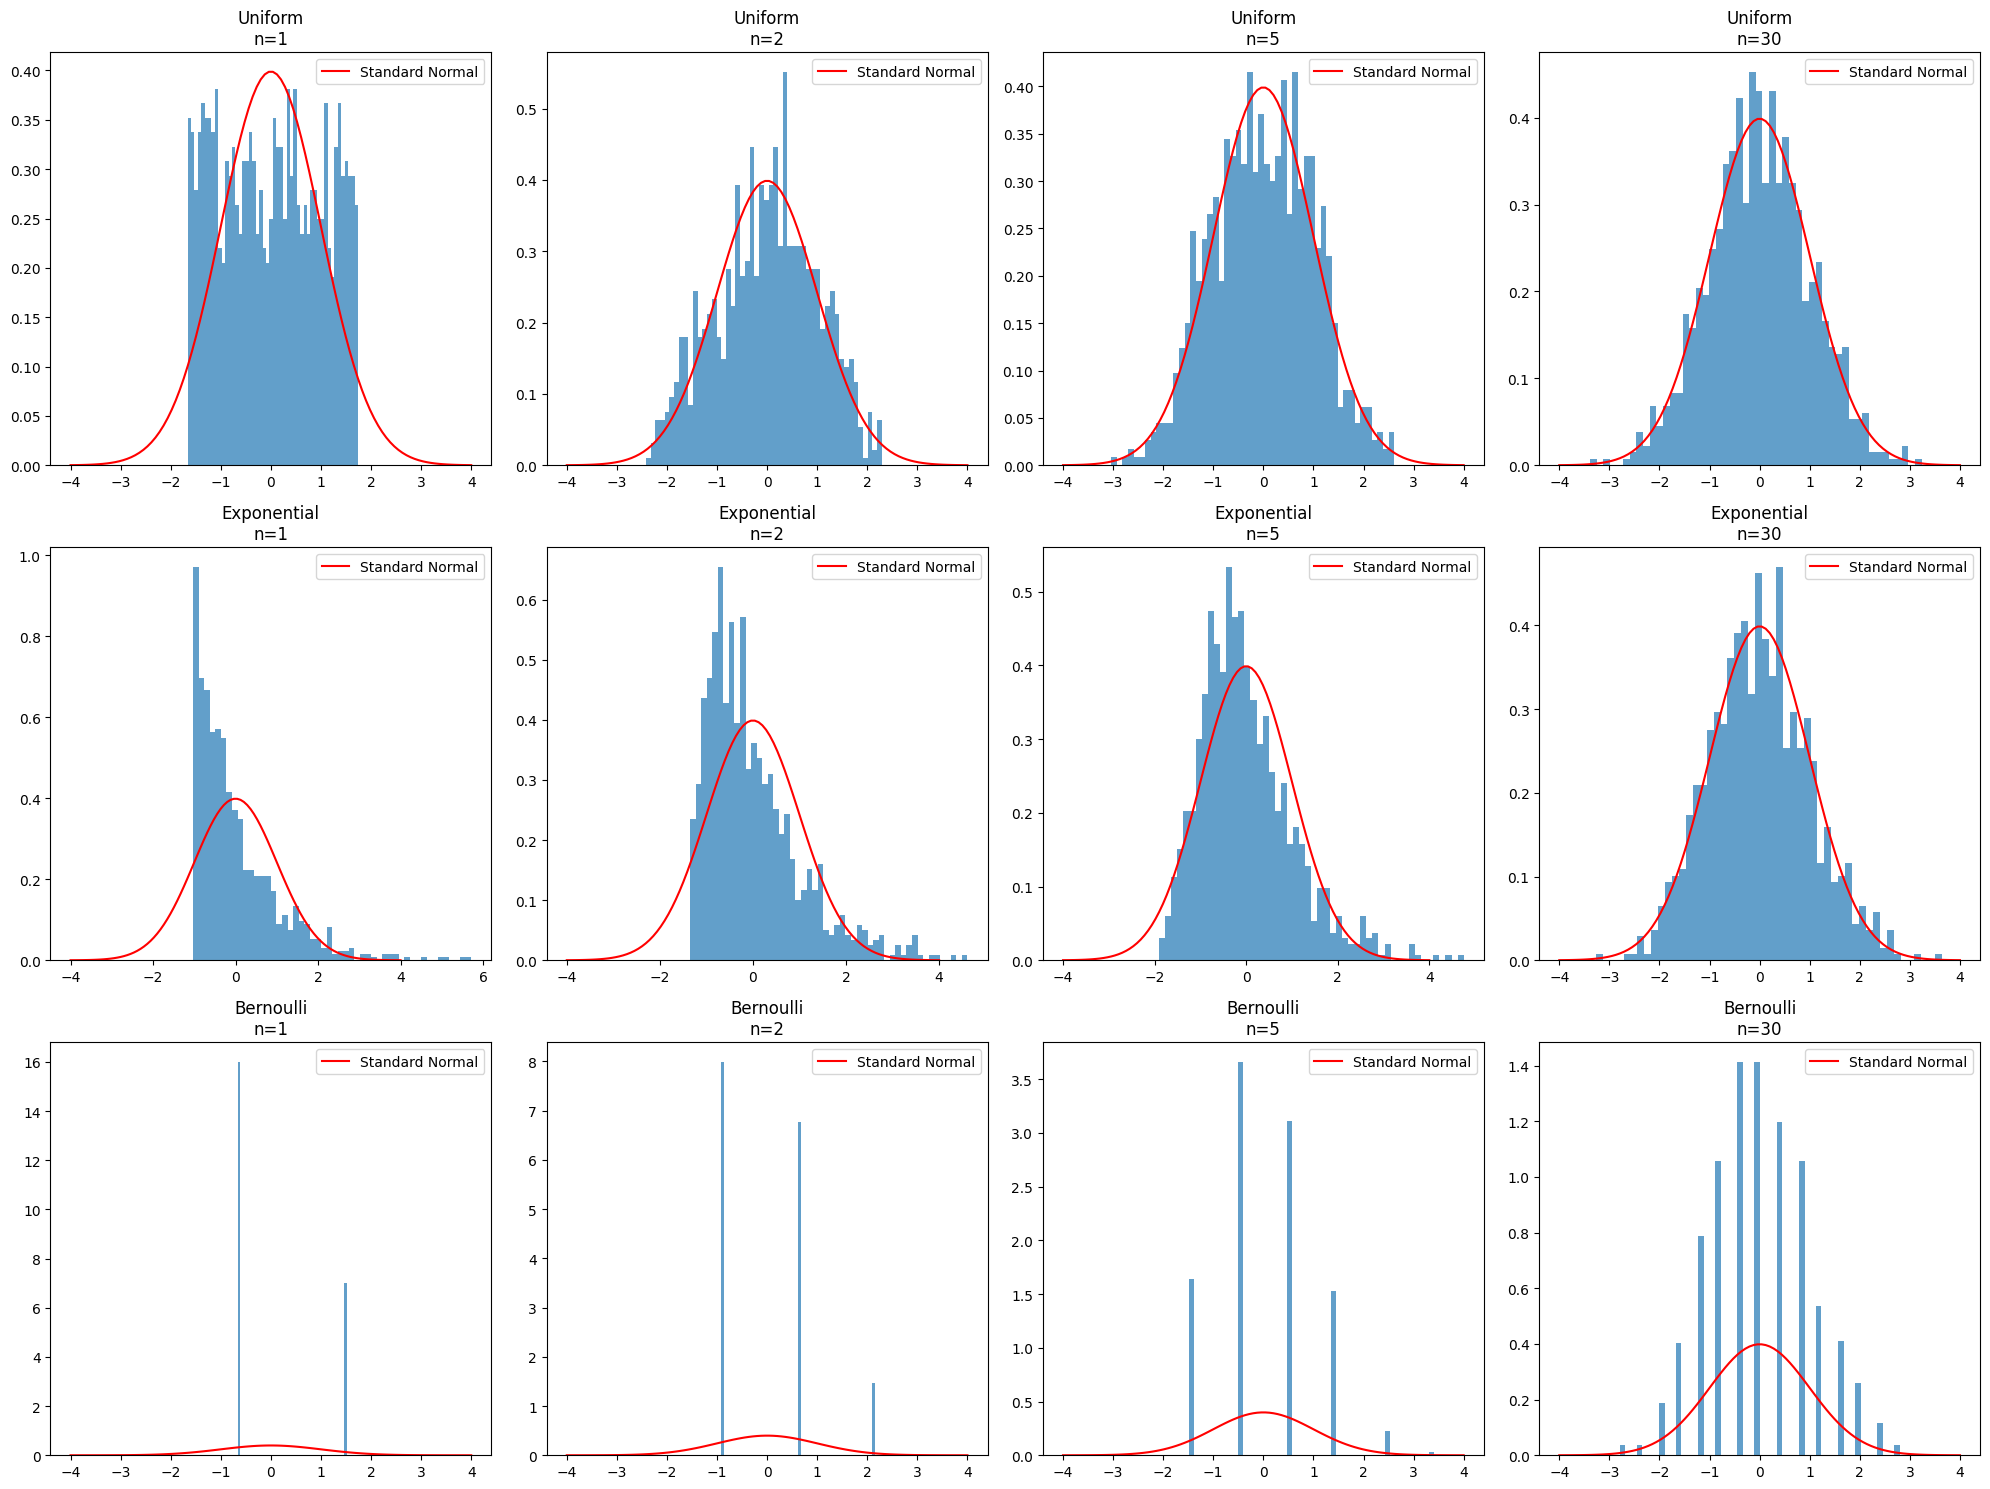

In [7]:
def demonstrate_clt():
    # Parameters
    n_samples = 1000
    sample_sizes = [1, 2, 5, 30]
    np.random.seed(42)
    
    # Different original distributions
    distributions = [
        ('Uniform', lambda n: np.random.uniform(0, 1, n)),
        ('Exponential', lambda n: np.random.exponential(1, n)),
        ('Bernoulli', lambda n: np.random.binomial(1, 0.3, n))
    ]
    
    fig, axes = plt.subplots(len(distributions), len(sample_sizes), 
                            figsize=(20, 15))
    
    for i, (dist_name, dist_func) in enumerate(distributions):
        for j, sample_size in enumerate(sample_sizes):
            # Generate samples of sums
            sums = []
            for _ in range(n_samples):
                sample = dist_func(sample_size)
                sample_mean = np.mean(sample)
                sums.append(sample_mean)
            
            # Standardize
            sums = np.array(sums)
            sums_standardized = (sums - np.mean(sums)) / np.std(sums)
            
            # Plot
            axes[i, j].hist(sums_standardized, bins=50, density=True, alpha=0.7)
            x = np.linspace(-4, 4, 100)
            axes[i, j].plot(x, norm.pdf(x, 0, 1), 'r-', label='Standard Normal')
            axes[i, j].set_title(f'{dist_name}\nn={sample_size}')
            axes[i, j].legend()
    
    plt.tight_layout()
    plt.show()

demonstrate_clt()

## Key Takeaways

1. **Distributions and Their Parameters**
   - Expected value and variance characterize distributions
   - Normal distribution is particularly important due to CLT
   - Different distributions model different types of phenomena

2. **Log Likelihood**
   - Useful tool for parameter estimation
   - Computationally advantageous
   - Basis for many statistical methods

3. **Maximum Likelihood Estimation**
   - Powerful method for parameter estimation
   - Asymptotically optimal under certain conditions